## Madrid Property Analysis

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Split
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
Here in the classification section, we have been given the liberty to conduct any classification exercise, based on the dataset we have been given. After looking at the dataset, some ideas that come to mind are:

- Investment Potential: Classify properties as "good investment" or "poor investment" based on historical price data and sociodemographic trends.  

- Price Category: Convert the continuous property price into categorical bins, such as "low", "medium", and "high". 

- Market Segment: Classify properties into market segments, such as "luxury", "affordable", or "investment properties". 

After brainstorming on ideas, I feel the best and most interesting problem to investigate could be to classify based on investment potential as we saw from the previous regression exercises that there are many labels on demographic data that can be very useful here. Hence our goal will be to use property, historical price, and sociodemographic trends from the dataset to classify the properties as excellent investment potential, good investment potential, moderate investment potential, and poor investment potential. (We will use numbers to represent these categories.)

NOTE: This file is setting up the data and understanding the basic data structure we have. It will be similar to the code in the regression section as we are only exploring the basic data currently, however will include the formation of the target variable. From the next steps, consisting of EDA, data pre-processing, and the model, the content will different to abide by this specific problem statement. 

#### 2) Data Collection
- Dataset Source - The dataset was provided to us and is located in the data/raw directory. 
- The data consists of 17857 rows and 26 columns.

##### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit


Import the Excel Data as Pandas DataFrame

In [40]:
df = pd.read_excel('../data/raw/session_7_dataset.xlsx')

##### 2.2 Dataset Information

Taking a Quick Look at the Data Structure

In [41]:
df.head()

,Unnamed: 0,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
0,0,3.0,141.0,990000,-3.656875,40.464347,Canillas,Hortaleza,3250,2.2,...,8.724674,2.527886,0.488949,0.175632,15.456193,NaN,40838,16155,NaN,161.894356
1,1,2.0,159.0,940000,-3.703523,40.419427,Universidad,Centro,5106,1.4,...,9.006094,1.975877,0.386598,0.083812,32.102460,0.529590,33418,16913,43.678945,352.500616
2,2,NaN,NaN,549000,-3.669626,40.435362,Guindalera,Salamanca,4100,0.6,...,7.441379,2.369951,0.365818,0.070351,18.224365,0.563831,42306,17851,46.477166,263.952286
3,3,2.0,232.0,750000,-3.720619,40.424164,Argüelles,Moncloa - Aravaca,4773,0.5,...,6.709633,2.328217,0.343683,0.066403,20.963846,0.589914,24423,10490,46.972342,322.402577
4,4,4.0,183.0,1550000,-3.705909,40.413214,Sol,Centro,4739,-5.5,...,9.058980,1.994244,0.433750,0.082242,39.490947,0.484009,7622,3822,44.632774,171.165183


In [42]:
df.shape

(17857, 26)

Straight of the bat, we can see we have mix of both categorical and numerical data, and we can also see some NaN's in the first few rows. We will take care of this later, however we also notice we have several features of which we will determine their importance later in the model. In specific, this is what the columns represent:

 - Unnamed: 0: An index or identifier for the rows.
- inm_floor: The floor number on which the property is located.
- inm_size: The size of the property in square meters.
- inm_price: The listing price of the property.
- inm_longitude: The longitude coordinate of the property.
- inm_latitude: The latitude coordinate of the property.
- inm_barrio: The neighborhood name where the property is located.
- inm_distrito: The district name where the property is located.
- his_price: A historical pricing reference for the property.
- his_quarterly_variation: The change in price from the previous quarter.
- his_annual_variation: The change in price from the previous year.
- his_monthly_variation: The change in price from the previous month.
- dem_Indice_de_reemplazo_de_la_poblacion_activa: An index measuring the replacement rate of the working-age population.
- dem_Indice_de_juventud: An index measuring the youthfulness of the population.
- dem_Indice_de_estructura_de_la_poblacion_activa: An index reflecting the structure of the working-age population.
- dem_Indice_de_dependencia: An index measuring the dependency ratio in the population.
- dem_TasaDeParo: The unemployment rate in the area.
- dem_TamanoMedioDelHogar: The average household size.
- dem_PropSinEstudiosUniversitarios: The proportion of the population without university-level education.
- dem_PropSinEstudios: The proportion of the population without any educational qualifications.
- dem_Proporcion_de_nacidos_fuera_de_Espana: The proportion of the population born outside of Spain.
- dem_PropConEstudiosUniversitarios: The proportion of the population with university-level education.
- dem_PobTotal: The total population in the area.
- dem_NumViviendas: The total number of dwellings in the area.
- dem_EdadMedia: The average age of the population in the area.
- dem_Densidad_(Habit/Ha): The population density per hectare in the area.



We will take care of missing values and all later in the preprocessing state, but right now we will check them, however, we will get rid of the index column as it's not needed in our analysis. 

In [43]:
df.drop(columns=['Unnamed: 0'], inplace=True)

#### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### 3.1 Check Missing Values

In [44]:
# Check for missing values in the dfFrame
print(df.isnull().sum())

inm_floor                                          3790
inm_size                                           1767
inm_price                                             0
inm_longitude                                         0
inm_latitude                                          0
inm_barrio                                         1794
inm_distrito                                       1747
his_price                                             0
his_quarterly_variation                               0
his_annual_variation                                  0
his_monthly_variation                                 0
dem_Indice_de_reemplazo_de_la_poblacion_activa        0
dem_Indice_de_juventud                                0
dem_Indice_de_estructura_de_la_poblacion_activa       0
dem_Indice_de_dependencia                             0
dem_TasaDeParo                                        0
dem_TamanoMedioDelHogar                               0
dem_PropSinEstudiosUniversitarios               

From the information above, we can notice that the inm_floor, inm_size, inm_barrio, inm_distrito, dem_PropConEstudiosUniversitarios, and dem_EdadMedia  features have missing values and for the floor its almost 1/6th of the dataset, and for others it's also quite a significant portion, so we will need to take care of this later in the processing. 

##### 3.2 Check Duplicates

In [45]:
df.duplicated().sum()

6

We can see there's no duplicates so we won't need to do anything related to duplicates from the raw dataset. 

##### 3.3 Check Data Types

In [46]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 25 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   inm_floor                                        14067 non-null  float64
 1   inm_size                                         16090 non-null  float64
 2   inm_price                                        17857 non-null  int64  
 3   inm_longitude                                    17857 non-null  float64
 4   inm_latitude                                     17857 non-null  float64
 5   inm_barrio                                       16063 non-null  object 
 6   inm_distrito                                     16110 non-null  object 
 7   his_price                                        17857 non-null  int64  
 8   his_quarterly_variation                          17857 non-null  float64
 9   his_annual_variation        

We can also see from the output above that we have int/float values which are our numerical variables, and we have 2 objects - inm_barrio, inm_distrito. Typically, an object could hold any kind of Python object, but since we loaded this data from an excel file, we know that it must be a text attribute. 

##### 3.4 Checking the number of unique values of each column

In [47]:
df.nunique()

inm_floor                                             23
inm_size                                             675
inm_price                                           2340
inm_longitude                                      16013
inm_latitude                                       16104
inm_barrio                                           121
inm_distrito                                          21
his_price                                            120
his_quarterly_variation                               70
his_annual_variation                                  89
his_monthly_variation                                 57
dem_Indice_de_reemplazo_de_la_poblacion_activa       121
dem_Indice_de_juventud                               121
dem_Indice_de_estructura_de_la_poblacion_activa      121
dem_Indice_de_dependencia                            121
dem_TasaDeParo                                       121
dem_TamanoMedioDelHogar                              121
dem_PropSinEstudiosUniversitari

##### 3.5 Check statistics of data set

In [48]:
df.describe()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,his_price,his_quarterly_variation,his_annual_variation,his_monthly_variation,dem_Indice_de_reemplazo_de_la_poblacion_activa,...,dem_TasaDeParo,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha)
count,14067.000000,16090.000000,1.785700e+04,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,...,17857.000000,17857.000000,17857.000000,17857.000000,17857.000000,16132.000000,17857.000000,17857.000000,16067.000000,17857.000000
mean,2.696453,149.013753,6.964702e+05,-3.688064,40.424817,3993.643389,0.437918,-1.814499,0.035549,58.387524,...,8.736896,2.487494,0.436518,0.124281,24.851753,0.439830,28281.995296,11515.008960,44.315032,233.372820
std,2.387135,160.485808,8.547274e+05,0.039164,0.031176,1589.895597,2.510048,3.847875,1.533065,23.241554,...,3.042722,0.300608,0.109068,0.076923,8.542049,0.181168,13117.299282,5322.072109,2.842113,122.653928
min,-1.000000,8.000000,1.600000e+04,-3.837697,40.328140,1290.000000,-16.100000,-11.600000,-5.200000,26.976744,...,3.643735,1.975877,0.246480,0.036422,8.884988,0.072421,2398.000000,872.000000,33.198916,2.267773
25%,1.000000,66.000000,1.899000e+05,-3.708170,40.402633,2578.000000,-1.100000,-4.300000,-0.600000,41.889843,...,6.291480,2.297491,0.340818,0.062095,18.746056,0.257582,18785.000000,8011.000000,43.161070,155.641754
50%,2.000000,98.000000,3.700000e+05,-3.692498,40.426586,4049.000000,0.500000,-2.200000,0.000000,51.910341,...,8.076921,2.466320,0.391468,0.085268,23.400147,0.512828,25023.000000,10637.000000,45.113343,228.165728
75%,4.000000,166.000000,8.490000e+05,-3.669516,40.446864,5106.000000,1.900000,-0.100000,0.900000,65.111111,...,10.802359,2.673612,0.551965,0.191202,31.219133,0.592631,36922.000000,15312.000000,46.244228,322.402577
max,60.000000,2400.000000,1.500000e+07,-3.545674,40.507659,8299.000000,12.200000,17.200000,8.100000,171.272727,...,18.030112,3.506552,0.641264,0.355659,53.296248,0.699977,67418.000000,26836.000000,49.332035,460.612389


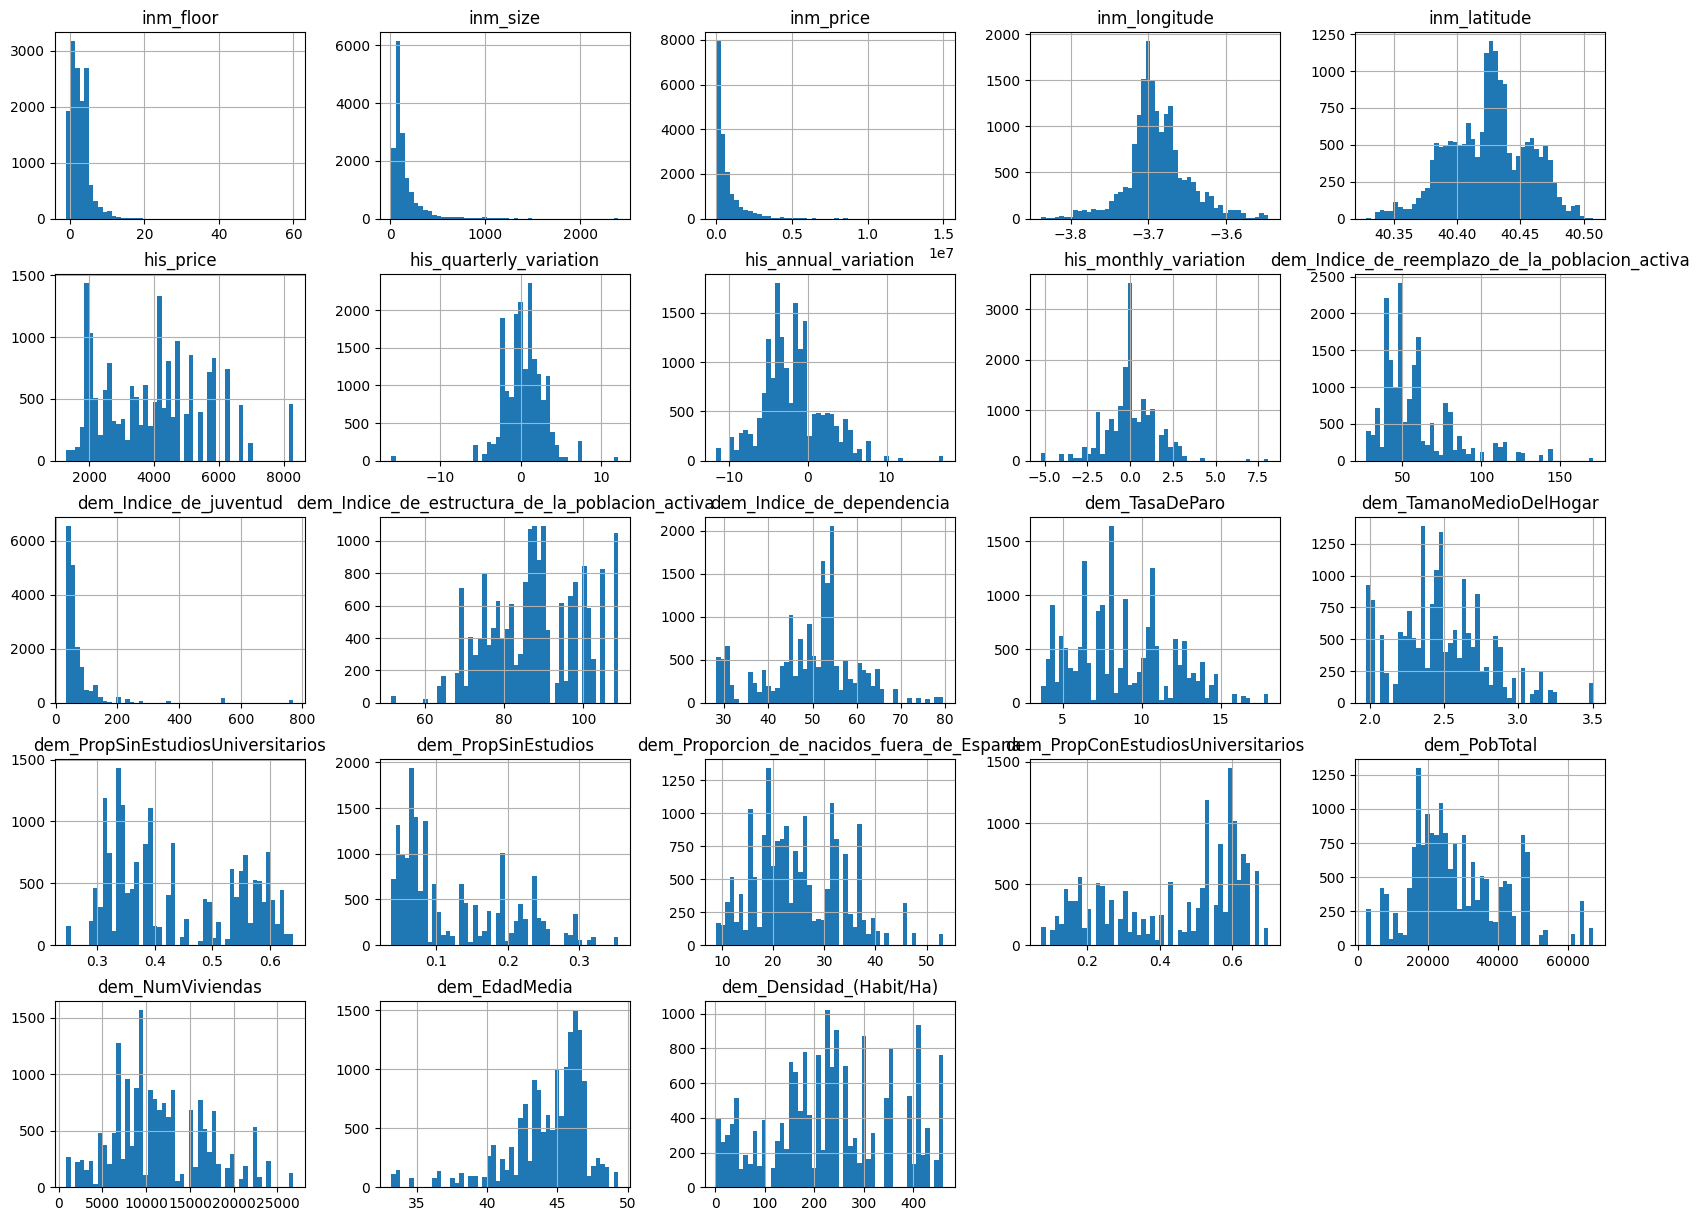

In [49]:
# %matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Here are some inferences we can make from the above histograms and statistical data provided. 

1. These attributes have very different scales, and we will take care of this while doing feature scaling.
2. We also notice that many histograms with the property related variables are tail-heavy: they extend much farther to the right of the median than to the left. We will try transforming these attributes later on to have more bell-shaped distributions. However, the demographic variables mostly seem to have average bell shaped distributions. 
3. The presence of long tails in the histograms for property-related variables indicates potential outliers. We will Identify and handle these outliers for accurate modeling and analysis.

#### 4. Feature Engineering + Target Variable Creation

We would split the data now, but we need to create our target variable first, and then we will split it. 

We will define our criteria that defines what makes an investment good or bad (these are not the classification types, we have 4 classification categories mentioned below). We will largely use domain knowledge, and combine it with the historical price appreciation and sociodemographic indicators. 

- To calculate historical price appreciation we will first get the historical price data at two different time points, and calculate the annualized rate of return as follows: df['annualized_return'] = (current_prices / historical_prices) ** (1 / years_elapsed) - 1
- Then we will choose a sociodemographic indicator that correlates with property investment potential. 
- Lastly, we will combine the annualized return and the sociodemographic score into a composite score.

With this information, we will be able to classify as good or poor investment. We will use this criteria:
- Excellent Investment: Above the 75th percentile
- Good Investment: Between the 50th and 75th percentile
- Moderate Investment: Between the 25th and 50th percentile
- Poor Investment: Below the 25th percentile



In [50]:
years_elapsed = 1

# Normalize 'inm_price' and 'his_price' using Min-Max scaling
df['inm_price_norm'] = (df['inm_price'] - df['inm_price'].min()) / (df['inm_price'].max() - df['inm_price'].min())
df['his_price_norm'] = (df['his_price'] - df['his_price'].min()) / (df['his_price'].max() - df['his_price'].min())

# Calculate the annualized return using normalized prices
df['annualized_return'] = (df['inm_price_norm'] / df['his_price_norm']) ** (1 / years_elapsed) - 1


# Normalizing the variables (subtracting the mean and dividing by the standard deviation)
# This is one way to normalize, but you might choose another method such as Min-Max scaling.
df['education_normalized'] = (df['dem_PropConEstudiosUniversitarios'] - df['dem_PropConEstudiosUniversitarios'].mean()) / df['dem_PropConEstudiosUniversitarios'].std()
df['youth_index_normalized'] = (df['dem_Indice_de_juventud'] - df['dem_Indice_de_juventud'].mean()) / df['dem_Indice_de_juventud'].std()
df['dependency_index_normalized'] = (df['dem_Indice_de_dependencia'] - df['dem_Indice_de_dependencia'].mean()) / df['dem_Indice_de_dependencia'].std()
df['population_density_normalized'] = (df['dem_Densidad_(Habit/Ha)'] - df['dem_Densidad_(Habit/Ha)'].mean()) / df['dem_Densidad_(Habit/Ha)'].std()

# Combine the normalized factors into a single socioeconomic score
factors = ['education_normalized', 'youth_index_normalized', 'dependency_index_normalized', 'population_density_normalized']
df['socioeconomic_score'] = df[factors].mean(axis=1)

# Now continue with the investment score calculation as before
w1, w2 = 0.7, 0.3  # Weights for the annualized return and socioeconomic score
df['investment_score'] = w1 * df['annualized_return'] + w2 * df['socioeconomic_score']

df.drop(['inm_price_norm', 'his_price_norm', 'education_normalized', 
         'youth_index_normalized', 'dependency_index_normalized', 'population_density_normalized'], axis=1, inplace=True)

# Determine the percentiles
percentile_25 = df['investment_score'].quantile(0.25)
percentile_50 = df['investment_score'].quantile(0.50)
percentile_75 = df['investment_score'].quantile(0.75)

# Categorize properties based on investment score percentiles and assign numeric labels
conditions = [
    df['investment_score'] > percentile_75,
    (df['investment_score'] <= percentile_75) & (df['investment_score'] > percentile_50),
    (df['investment_score'] <= percentile_50) & (df['investment_score'] > percentile_25),
    df['investment_score'] <= percentile_25
]

choices = [3, 2, 1, 0]  # Numeric labels for Excellent=3, Good=2, Moderate=1, Poor=0

df['investment_category'] = np.select(conditions, choices)

# Check the distribution of the new investment categories
investment_category_distribution = df['investment_category'].value_counts().sort_index()

investment_category_distribution

investment_category
0    4467
1    4462
2    4464
3    4464
Name: count, dtype: int64

From this, we can see an equal split among the categories which is ideal for us and we can now go ahead to splitting our dataset into train and test sets. 

#### 5. Train Test Split


We will be splitting the data into training and testing sets. Spliiting the data at this point will help us to avoid data leakage, data snooping and overfitting.
We will use the training set to train the model and the testing set to evaluate the model.

Given that now we have a classification problem with evenly distributed classes, using stratified sampling for our train-test split is a good practice. Stratified sampling will ensure that our train and test sets have the same proportion of each category as the original dataset, which is particularly important in classification problems to prevent introducing bias into our model.

Since we've categorized your properties into four investment categories (0: Poor, 1: Moderate, 2: Good, 3: Excellent), it makes sense to stratify based on the investment_category column. This ensures that each split reflects the overall distribution of the investment potential categories.

In [51]:
# Now we perform stratified sampling based on the size category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['investment_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# The resulting 'strat_train_set' and 'strat_test_set' will maintain the distribution of investment_category
# Let's check the distribution of the size investment_category in the stratified train set
print(strat_train_set['investment_category'].value_counts(normalize=True))
print(strat_test_set['investment_category'].value_counts(normalize=True))

# Save the stratified train and test sets as CSV files
strat_train_set.to_csv('../data/split/stratified_train_set.csv', index=False)
strat_test_set.to_csv('../data/split/stratified_test_set.csv', index=False)

investment_category
0    0.250123
3    0.249982
2    0.249982
1    0.249912
Name: proportion, dtype: float64
investment_category
0    0.25028
3    0.25000
2    0.25000
1    0.24972
Name: proportion, dtype: float64
